# Exploratory Analysis

This notebook is to analyse the energy data and come up with more conclusion

In [2]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import math


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

### Load Data

In [3]:
data= pd.read_csv("./Dataset/energydata_complete.csv")

In [4]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<h6>Variable Description<br />
====================</h6>

<ul>
	<li>date time year-month-day hour:minute:second&nbsp;</li>
	<li>Appliances, energy use in Wh</li>
	<li>lights, energy use of light fixtures in the house in Wh</li>
	<li>T1, Temperature in kitchen area, in Celsius</li>
	<li>RH_1, Humidity in kitchen area, in %</li>
	<li>T2, Temperature in living room area, in Celsius</li>
	<li>RH_2, Humidity in living room area, in %</li>
	<li>T3, Temperature in laundry room area</li>
	<li>RH_3, Humidity in laundry room area, in %</li>
	<li>T4, Temperature in office room, in Celsius</li>
	<li>RH_4, Humidity in office room, in %</li>
	<li>T5, Temperature in bathroom, in Celsius</li>
	<li>RH_5, Humidity in bathroom, in %</li>
	<li>T6, Temperature outside the building (north side), in Celsius</li>
	<li>RH_6, Humidity outside the building (north side), in %</li>
	<li>T7, Temperature in ironing room , in Celsius</li>
	<li>RH_7, Humidity in ironing room, in %</li>
	<li>T8, Temperature in teenager room 2, in Celsius</li>
	<li>RH_8, Humidity in teenager room 2, in %</li>
	<li>T9, Temperature in parents room, in Celsius</li>
	<li>RH_9, Humidity in parents room, in %</li>
	<li>To, Temperature outside (from Chi&egrave;vres weather station), in Celsius</li>
	<li>Pressure (from Chi&egrave;vres weather station), in mm Hg</li>
	<li>RH_out, Humidity outside (from Chi&egrave;vres weather station), in %</li>
	<li>Windspeed (from Chi&egrave;vres weather station), in m/s</li>
	<li>Visibility (from Chi&egrave;vres weather station), in km</li>
	<li>Tdewpoint (from Chi&egrave;vres weather station), &deg;C</li>
	<li>rv1, Random variable 1, nondimensional</li>
	<li>rv2, Rnadom variable 2, nondimensional</li>
</ul>

<p>Where indicated, data from the nearest airport weather station (Chi&egrave;vres Airport, Belgium) was downloaded from a public data set from&nbsp;</p>

<p>Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.<br />
&nbsp;</p>


In [5]:
data.shape

(19735, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [7]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

We can conclud that there is no missing values here.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [9]:
data_date = data["date"]
print("First Date time of Observation : ",data_date[0])
print("Last Date time of Observation : ",data_date.iloc[-1])

First Date time of Observation :  2016-01-11 17:00:00
Last Date time of Observation :  2016-05-27 18:00:00


In [10]:
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

In [11]:
data["date"].map(lambda x: x.time())

0        17:00:00
1        17:10:00
2        17:20:00
3        17:30:00
4        17:40:00
5        17:50:00
6        18:00:00
7        18:10:00
8        18:20:00
9        18:30:00
10       18:40:00
11       18:50:00
12       19:00:00
13       19:10:00
14       19:20:00
15       19:30:00
16       19:40:00
17       19:50:00
18       20:00:00
19       20:10:00
20       20:20:00
21       20:30:00
22       20:40:00
23       20:50:00
24       21:00:00
25       21:10:00
26       21:20:00
27       21:30:00
28       21:40:00
29       21:50:00
           ...   
19705    13:10:00
19706    13:20:00
19707    13:30:00
19708    13:40:00
19709    13:50:00
19710    14:00:00
19711    14:10:00
19712    14:20:00
19713    14:30:00
19714    14:40:00
19715    14:50:00
19716    15:00:00
19717    15:10:00
19718    15:20:00
19719    15:30:00
19720    15:40:00
19721    15:50:00
19722    16:00:00
19723    16:10:00
19724    16:20:00
19725    16:30:00
19726    16:40:00
19727    16:50:00
19728    17:00:00
19729    1

In [12]:
def dayoftheweek(day):
    if(day==0):
        return("Monday")
    if(day==1):
        return("Tuesday")
    if(day==2):
        return("Wednesday")
    if(day==3):
        return("Thurday")
    if(day==4):
        return("Friday")
    if(day==5):
        return("Saturday")
    if(day==6):
        return("Sunday")

In [13]:
data["dayoftheweek"] = data['date']
data["dayoftheweek"] = data['dayoftheweek'].apply(lambda x: dayoftheweek(x.dayofweek))
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,Monday
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,Monday
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,Monday
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,Monday
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,Monday


In [14]:
data.groupby('dayoftheweek').count()["date"]

dayoftheweek
Friday       2845
Monday       2778
Saturday     2736
Sunday       2736
Thurday      2880
Tuesday      2880
Wednesday    2880
Name: date, dtype: int64

In [15]:
def weekdaytype(day):
    if(day=="Saturday" or day == "Sunday"):
        return "weekend"
    else:
        return "Weekday"

In [16]:
data["WeekDayType"] = data["dayoftheweek"]
data["WeekDayType"] = data['WeekDayType'].apply(lambda x: weekdaytype(x))
data.groupby('WeekDayType').count()["date"]

WeekDayType
Weekday    14263
weekend     5472
Name: date, dtype: int64

In [17]:
data["TimeDelta"] = (data["date"]-data["date"].shift()).fillna(0)

In [18]:
data.groupby('TimeDelta').count()["date"]

TimeDelta
00:00:00        1
00:10:00    19734
Name: date, dtype: int64

In [19]:
t = np.arange(0.0,1.0,0.01)

In [20]:
data["date"][0].month

1

In [21]:
#no. of years
years = data["date"].apply(lambda x: x.year)
years_indata = years.unique()
years_indata

array([2016], dtype=int64)

In [22]:
#no. of months
months = data["date"].apply(lambda x: x.month)
months_indata = months.unique()
months_indata

array([1, 2, 3, 4, 5], dtype=int64)

In [23]:
#no. of hours
hours = data['date'].apply(lambda x : x.hour)
hours_indata = hours.unique()
hours_indata

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [24]:
# Added Months and Hour column in a test dataframe
test = data.copy()
test.head()
test['months'] = test['date'].apply(lambda x : x.month)
test['hour'] = test['date'].apply(lambda x : x.hour)
test.shape


(19735, 34)

In [25]:
# Hourly energy consumption
test.groupby(['hour'])['Appliances'].apply(lambda x : sum(x))

hour
0      43390
1      42190
2      40340
3      39650
4      40570
5      43350
6      47440
7      64650
8      87250
9      92710
10    103060
11    109430
12    101630
13    102540
14     89010
15     86990
16     98560
17    133600
18    156670
19    117600
20    104380
21     79320
22     56840
23     46840
Name: Appliances, dtype: int64

In [26]:
#Monthly energy consumption
test.groupby(['months'])['Appliances'].apply(lambda x : sum(x))

months
1    283510
2    421550
3    432800
4    427200
5    362950
Name: Appliances, dtype: int64

In [27]:
energy_data_Total_per_hour = test.groupby(['hour'])['Appliances'].apply(lambda x : sum(x))
#energy_data_Total_per_hour['Day_week'] = test['dayoftheweek']
energy_data_Total_per_hour.head()

hour
0    43390
1    42190
2    40340
3    39650
4    40570
Name: Appliances, dtype: int64

In [28]:
def hourlyEnergyData(hour):
    energy_data_Total_per_hour = test[(test['date'].map(lambda x: x.hour) == hour) ]
    print(energy_data_Total_per_hour['Appliances'].sum())

In [29]:
def monthlyEnergyData(month):
    energy_data_Total_per_month = test[(test['date'].map(lambda x: x.month) == month) ]
    print(energy_data_Total_per_month['Appliances'].sum())

In [30]:
def dayEnergyData(day):
    energy_data_Total_per_day = test[(test['date'].map(lambda x: x.day) == day) ]
    print(energy_data_Total_per_day['Appliances'].sum())

In [31]:
monthlyEnergyData(1)
hourlyEnergyData(1)
dayEnergyData(27)

283510
42190
54750


In [32]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek,WeekDayType,TimeDelta
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday,Weekday,00:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday,Weekday,00:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday,Weekday,00:10:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday,Weekday,00:10:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday,Weekday,00:10:00
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,Monday,Weekday,00:10:00
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,Monday,Weekday,00:10:00
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,Monday,Weekday,00:10:00
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,Monday,Weekday,00:10:00
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,Monday,Weekday,00:10:00


In [33]:
data["date"] = data["date"].map(lambda x: str(x))

In [34]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek,WeekDayType,TimeDelta
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Monday,Weekday,00:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Monday,Weekday,00:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Monday,Weekday,00:10:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Monday,Weekday,00:10:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Monday,Weekday,00:10:00


In [35]:
data = pd.get_dummies(data, columns=["WeekDayType"])
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek,TimeDelta,WeekDayType_Weekday,WeekDayType_weekend
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Monday,00:00:00,1,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Monday,00:10:00,1,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Monday,00:10:00,1,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Monday,00:10:00,1,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Monday,00:10:00,1,0


In [36]:
data.to_csv("eda_new.csv",index =False)

### Linear Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [38]:
data['NSM'] = pd.to_datetime(data['date'])
data['NSM'] = (data['NSM'].dt.hour*60 + data['NSM'].dt.minute)*60 + data['NSM'].dt.second

In [39]:
#Select response y and Training set X
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'T7', 'T8', 'Windspeed','Tdewpoint','NSM','WeekDayType_Weekday','WeekDayType_weekend']
X = data[my_cols]
y = data['Appliances']

In [40]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
lm = linear_model.LinearRegression()

In [42]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
predict = lm.predict(X_test)

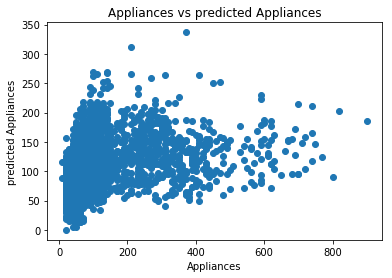

In [44]:
# scatter plot
plt.scatter(y_test, predict)
plt.xlabel('Appliances')
plt.ylabel("predicted Appliances")
plt.title("Appliances vs predicted Appliances")
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predict))

In [46]:
rms

92.75784207118699

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.1338697384215255

### Multiple Linear Regression

In [48]:
import statsmodels.api as sm

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [49]:
from pandas.core import datetools

#Select response y and Training set X
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']
X = data[my_cols]
y = data['Appliances']

In [50]:
X.shape

(19735, 18)

In [51]:
y.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

In [52]:
#splitting dataset into training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [53]:
# Fitting Multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred


array([180.50929938,  96.07107154, 164.48941172, ...,  62.03177146,
       132.08803478, 105.98619731])

In [55]:
# Building the optimal model 
import statsmodels.formula.api as sm
X = X.values
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:15:12   Log-Likelihood:            -1.1787e+05
No. Observations:               19735   AIC:                         2.358e+05
Df Residuals:                   19717   BIC:                         2.359e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3865      0.094     25.325      0.000       2.202       2.571
x2           -13.3466      1.659     -8.043      0.000     -16.599     -10.094
x3             6.5171      0.462     14.092      0.000       5.611       7.424
x4             6.0510      0.903      6.699      0.000       4.281       7.821
x5            22.6571      1.000     22.658      0.000      20.697      24.617
x6             2.1330      0.605      3.525      0.000       0.947       3.319
x7            -8.5767      1.000     -8.577      0.000     -10.537      -6.617
x8            -5.9354      0.549    -10.804      0.000      -7.012      -4.859
x9            -7.4480      1.074     -6.938      0.000      -9.552      -5.344
x10           -0.0580      0.087     -0.669      0.503      -0.228       0.112
x11            3.1451      0.318      9.889      0.000       2.522       3.768
x12           -3.5265      0.990     -3.562      0.000      -5.467      -1.586
x13            4.6407      0.906      5.121      0.000       2.864       6.417
x14            1.6725      0.318      5.263      0.000       1.050       2.295
x15           -5.8646      0.442    -13.275      0.000      -6.730      -4.999
x16            0.0006   3.26e-05     17.076      0.000       0.000       0.001
x17         -101.9520     19.227     -5.303      0.000    -139.639     -64.265
x18          -96.4965     19.218     -5.021      0.000    -134.165     -58.828
==============================================================================
Omnibus:                    13976.619   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207919.540
Skew:                           3.334   Prob(JB):                         0.00
Kurtosis:                      17.436   Cond. No.                     1.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
X.shape

(19735, 18)

### Fit a classification tree using DecisionTreeClassifier() in scikit-learn

#Select response y and Training set X
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']
X = data[my_cols]
y = data['Appliances']

In [57]:
from sklearn import tree
cltree = tree.DecisionTreeClassifier()
cltree = cltree.fit(X, y)

In [58]:
X.shape

(19735, 18)

### Accuracy of this model

In [59]:
#Evaluate the model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(cltree, X, y, cv=10)
print(scores.mean())

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.042206355121147454


### RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
#splitting dataset into training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [62]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [63]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy',  random_state=0, max_features=3 )
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
p = classifier.feature_importances_
p.shape

(18,)

In [65]:
df1 = pd.DataFrame(p,index = my_cols )
df1

,0
lights,0.025645
T1,0.056128
RH_1,0.062252
T2,0.062844
T3,0.059786
RH_3,0.059988
T4,0.052498
RH_4,0.060225
T5,0.055427
RH_5,0.065929


In [66]:
y_pred = classifier.predict(X_test)
print(r2_score(y_test, y_pred))
rmse = sqrt(mean_squared_error(test_y, y_pred))
print('Test RMSE: %.3f' % rmse)

0.4043242441000442


NameError: name 'test_y' is not defined

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 25,  random_state=0, max_features=3 )
classifier.fit(X_train, y_train)

In [ ]:
predict_GBC = classifier.predict(X_test)

In [ ]:
r2_score(y_test, predict_GBC)

## Keras Tensor Flow

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#Select response y and Training set X
# my_cols = ['lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'T7', 'T8', 'Windspeed','Tdewpoint','NSM']
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'T7', 'T8', 'Windspeed','Tdewpoint','NSM']
X = data[my_cols].values
y = data['Appliances']
# split into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 0)


# reshape input to be 3D [samples, timesteps, features]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=12, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)

In [ ]:
rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
r2_score(test_y, yhat)

In [67]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [68]:
validation_size = 0.20
X = data[my_cols].values
y = data['Appliances']
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [69]:
seed = 10
scoring = 'accuracy'

In [78]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.190848 (0.047747)


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

LDA: -1.142916 (0.280891)
KNN: -0.088733 (0.016892)
CART: 0.169321 (0.121532)
NB: -4.361276 (0.813494)


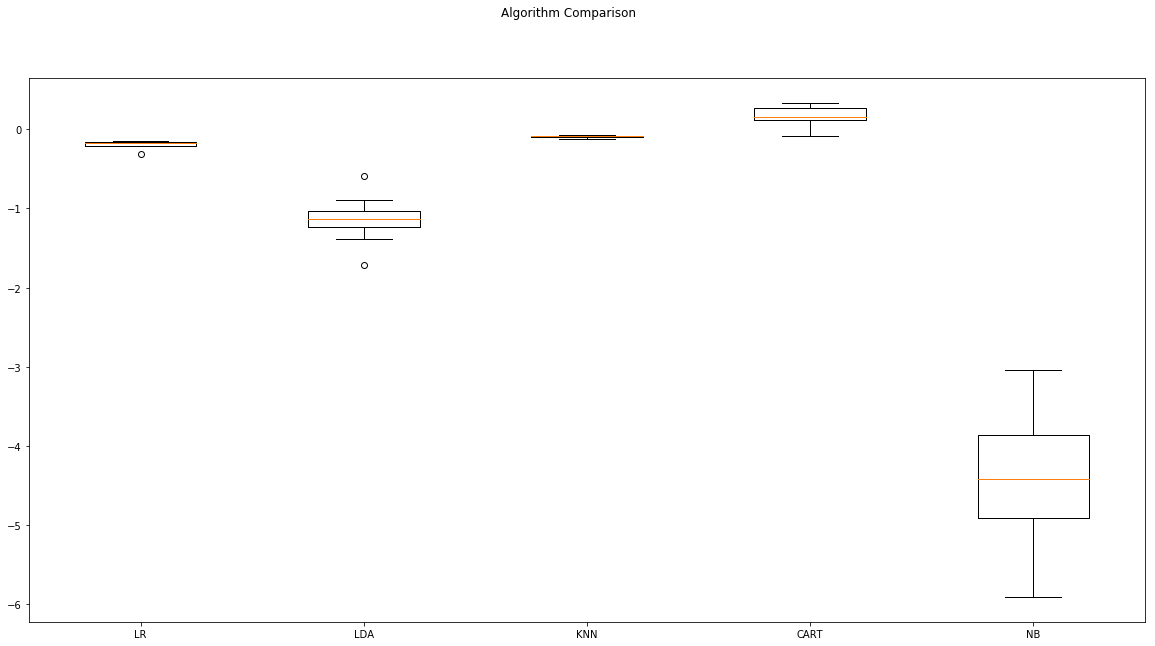

In [79]:
# Compare Algorithms
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()